In [21]:

#!git clone https://github.com/ultralytics/yolov5
!cd yolov5 & pip install -r requirements.txt


fatal: destination path 'yolov5' already exists and is not an empty directory.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [22]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid   # Unique identifier
import os
import time

In [23]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\fktrc/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-30 Python-3.9.12 torch-1.8.1+cu111 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [46]:
import xml.etree.ElementTree as ET
import glob
import os
import json


def xml_to_yolo_bbox(bbox, w, h):
    # xmin, ymin, xmax, ymax
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h
    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h
    return [x_center, y_center, width, height]


def yolo_to_xml_bbox(bbox, w, h):
    # x_center, y_center width heigth
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2
    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)
    return [xmin, ymin, xmax, ymax]

classes = []
input_dir = r"C:\Users\fktrc\Downloads\yolov5\data\labels"
output_dir = r"C:\Users\fktrc\Downloads\yolov5\data\labels"
image_dir = r"C:\Users\fktrc\Downloads\yolov5\data\images"

# create the labels folder (output directory)

# identify all the xml files in the annotations folder (input directory)
files = glob.glob(os.path.join(input_dir, '*.xml'))
# loop through each 
for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    # check if the label contains the corresponding image file
    if not os.path.exists(os.path.join(image_dir, f"{filename}.png")):
        print(f"{filename} image does not exist!")
        continue

    result = []

    # parse the content of the xml file
    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)

    for obj in root.findall('object'):
        label = obj.find("name").text
        # check for new classes and append to list
        if label not in classes:
            classes.append(label)
        index = classes.index(label)
        pil_bbox = [int(x.text) for x in obj.find("bndbox")]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)
        # convert data to string
        bbox_string = " ".join([str(x) for x in yolo_bbox])
        result.append(f"{index} {bbox_string}")

    if result:
        # generate a YOLO format text file for each xml file
        with open(os.path.join(output_dir, f"{filename}.txt"), "w", encoding="utf-8") as f:
            f.write("\n".join(result))


In [24]:
#!git clone https://github.com/tzutalin/labelImg
#!pip install pyqt5 lxml --upgrade
!cd yolov5 && labelImg libs/resources.py resources.qrc

In [ ]:
!python train.py --img 320 --batch 4 --epochs 50 --data dataset.yaml --weights yolov5s.pt --workers 2

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\fktrc/.cache\torch\hub\master.zip
YOLOv5  2023-1-30 Python-3.9.12 torch-1.8.1+cu111 CPU



Exception: [Errno 2] No such file or directory: 'yolov5\\runs\\train\\exp15\\weights\\last.pt'. Cache may be out of date, try `force_reload=True` or see https://github.com/ultralytics/yolov5/issues/36 for help.

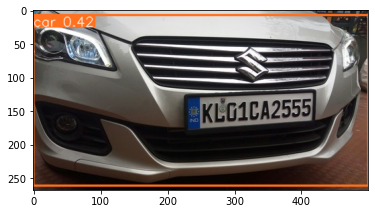

In [11]:
img = r"C:\Users\fktrc\Downloads\yolov5\data\images\Cars0.png"
results = model(img)
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()